In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
# Could have used pd.read_csv() which has a skiprows argument to start reading in the data at whatever line specified.
tornado_911calls = gpd.read_file('../data/CallsTornado_CLEAN.csv')
tornado_911calls.head(10)

DateTime    Latitude    Longitude                Cell Tower Address  \
0  3/3/2020 0:34   36.072708   -86.665779        620 Richards RD - N Sector   
1  3/3/2020 0:36   36.159634   -86.841904            4507D KENTUCKY AV - SE   
2  3/3/2020 0:36   36.264153   -86.708862          329 THELMA ST - S Sector   
3  3/3/2020 0:36  36.1569696  -86.8807362                    526 FOUNDRY DR   
4  3/3/2020 0:36  36.1788392  -86.6922858              5007B RUSKIN AVE - N   
5  3/3/2020 0:37   36.176152  -86.6080617                   WIRELESS CALLER   
6  3/3/2020 0:37   36.176152  -86.6080617                   WIRELESS CALLER   
7  3/3/2020 0:37   36.176152  -86.6080617                   WIRELESS CALLER   
8  3/3/2020 0:38  36.1800175  -86.7588231  201 FORREST VALLEY DR - SECTOR S   
9  3/3/2020 0:38  36.1800175  -86.7588231                     415 CHURCH ST   

  geometry  
0     None  
1     None  
2     None  
3     None  
4     None  
5     None  
6     None  
7     None  
8     None  
9     None

In [3]:
tornado_911calls.geometry = tornado_911calls.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)

tornado_911calls.head(3)

DateTime   Latitude   Longitude          Cell Tower Address  \
0  3/3/2020 0:34  36.072708  -86.665779  620 Richards RD - N Sector   
1  3/3/2020 0:36  36.159634  -86.841904      4507D KENTUCKY AV - SE   
2  3/3/2020 0:36  36.264153  -86.708862    329 THELMA ST - S Sector   

                     geometry  
0  POINT (-86.66578 36.07271)  
1  POINT (-86.84190 36.15963)  
2  POINT (-86.70886 36.26415)

In [4]:
tornado_911calls.plot();

In [60]:
county_center = [36.166, -86.78]
davidson_map = folium.Map(location = county_center, zoom_start = 12)

for row_index, row_values in tornado_911calls.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['DateTime'])
    icon=folium.Icon(color="red",icon="phone", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(davidson_map)
    
folium.GeoJson(tornado_paths.loc[tornado_paths.event_id == 'Nashville']).add_to(davidson_map)
folium.GeoJson(path_polygons).add_to(davidson_map)
davidson_map

In [7]:
tornado_incidents = gpd.read_file('../data/TornadoIncidents_CLEAN.csv')
tornado_911calls.head(10)

DateTime    Latitude    Longitude                Cell Tower Address  \
0  3/3/2020 0:34   36.072708   -86.665779        620 Richards RD - N Sector   
1  3/3/2020 0:36   36.159634   -86.841904            4507D KENTUCKY AV - SE   
2  3/3/2020 0:36   36.264153   -86.708862          329 THELMA ST - S Sector   
3  3/3/2020 0:36  36.1569696  -86.8807362                    526 FOUNDRY DR   
4  3/3/2020 0:36  36.1788392  -86.6922858              5007B RUSKIN AVE - N   
5  3/3/2020 0:37   36.176152  -86.6080617                   WIRELESS CALLER   
6  3/3/2020 0:37   36.176152  -86.6080617                   WIRELESS CALLER   
7  3/3/2020 0:37   36.176152  -86.6080617                   WIRELESS CALLER   
8  3/3/2020 0:38  36.1800175  -86.7588231  201 FORREST VALLEY DR - SECTOR S   
9  3/3/2020 0:38  36.1800175  -86.7588231                     415 CHURCH ST   

                     geometry  
0  POINT (-86.66578 36.07271)  
1  POINT (-86.84190 36.15963)  
2  POINT (-86.70886 36.26415)  
3  POINT (-86.88074 36.15697)  
4  POINT (-86.69229 36.17884)  
5  POINT (-86.60806 36.17615)  
6  POINT (-86.60806 36.17615)  
7  POINT (-86.60806 36.17615)  
8  POINT (-86.75882 36.18002)  
9  POINT (-86.75882 36.18002)

In [8]:
tornado_incidents.geometry = tornado_incidents.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)

tornado_911calls.head(3)

DateTime   Latitude   Longitude          Cell Tower Address  \
0  3/3/2020 0:34  36.072708  -86.665779  620 Richards RD - N Sector   
1  3/3/2020 0:36  36.159634  -86.841904      4507D KENTUCKY AV - SE   
2  3/3/2020 0:36  36.264153  -86.708862    329 THELMA ST - S Sector   

                     geometry  
0  POINT (-86.66578 36.07271)  
1  POINT (-86.84190 36.15963)  
2  POINT (-86.70886 36.26415)

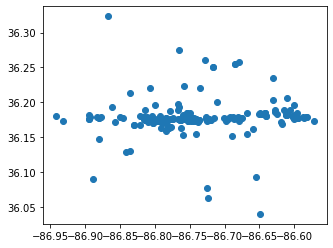

In [9]:
tornado_incidents.plot();

In [14]:
tornado_paths = gpd.read_file('../data/tornado_paths.geojson')
print(tornado_paths.crs)
tornado_paths.head( )

epsg:4326


objectid                 event_id      stormdate      starttime  \
0    879879                Nashville  1583217120000  1583217120000   
1    879077  Hwy 69 Ballpark Tornado  1583237040000  1583237040000   
2    879081           Lawley Tornado  1583238480000  1583238480000   
3    879877               Cookeville  1583221680000  1583221680000   
4    879878                  Goffton  1583222700000  1583222700000   

         endtime  startlat  startlon   endlat   endlon   length  ...  \
0  1583220900000   36.1725  -86.9478  36.1532 -85.8860  60.1317  ...   
1  1583237520000   32.6846  -87.6226  32.6863 -87.5492   4.3400  ...   
2  1583239080000   32.8648  -87.0496  32.8646 -86.9432   6.2100  ...   
3  1583222160000   36.1715  -85.6628  36.1709 -85.5135   8.3900  ...   
4  1583222760000   36.1075  -85.4461  36.1068 -85.4420   0.2300  ...   

   propdamage  edit_user  edit_time created_user   created_date  \
0         -99       None       None      DATians  1583461561000   
1         -99       None       None      DATians  1583353305000   
2         -99       None       None      DATians  1583357522000   
3      100000       None       None      DATians  1583461208000   
4         -99       None       None      DATians  1583461360000   

  last_edited_user  last_edited_date  \
0       dat_editor     1618703241000   
1          DATians     1583358165000   
2          DATians     1583359203000   
3          DATians     1590771008000   
4          DATians     1590604073000   

                                            comments  Shape__Length  \
0  An historic, long-track, strong EF-3 tornado b...       1.071075   
1                                               None       0.074159   
2                                               Path       0.106695   
3  An historic, violent EF-4 tornado began in wes...       0.149870   
4  A very brief and weak EF-0 tornado touched dow...       0.004130   

                                            geometry  
0  LINESTRING (-86.94783 36.17249, -86.94461 36.1...  
1  LINESTRING (-87.62263 32.68464, -87.62182 32.6...  
2  LINESTRING (-87.04956 32.86476, -87.04019 32.8...  
3  LINESTRING (-85.66285 36.17151, -85.61103 36.1...  
4  LINESTRING (-85.44610 36.10746, -85.44203 36.1...  

[5 rows x 29 columns]

In [36]:
tornado_paths.loc[tornado_paths.event_id == 'Nashville'].plot();

In [51]:
damage_points = gpd.read_file('../data/damage_points.geojson')
print(damage_points.crs)
damage_points.tail(50)

epsg:4326


objectid      stormdate     surveydate   event_id  damage  \
3917   2114088  1583219820000  1588473540000                  2   
3918   2114089  1583219820000  1588473540000                  1   
3919   2114090  1583219940000  1588473960000                  2   
3920   2114091  1583219940000  1588475820000                  1   
3921   2114092  1583219940000  1588475940000                  1   
3922   2114093  1583219940000  1588475940000                  1   
3923   2114094  1583220000000  1588476060000                  2   
3924   2114095  1583220000000  1588476360000                  1   
3925   2114096  1583220000000  1588476420000                  1   
3926   2114097  1583220060000  1588476600000                  4   
3927   2114098  1583220060000  1588480560000                  2   
3928   2114099  1583220060000  1588480620000                  2   
3929   2114100  1583220180000  1588480860000                  2   
3930   2114101  1583220180000  1588481040000                  4   
3931   2114102  1583220180000  1588481220000                  1   
3932   2114103  1583220240000  1588481280000                  1   
3933   2114104  1583220240000  1588481400000                  1   
3934   2114105  1583220240000  1588481640000                  1   
3935   2114106  1583220240000  1588481760000                  1   
3936   2114107  1583220300000  1588482060000                  3   
3937   2114108  1583220300000  1588482540000                  1   
3938   2114109  1583220360000  1588482720000                  2   
3939   2114110  1583220420000  1588483080000                  1   
3940   2114111  1583220420000  1588483140000                  1   
3941   2114112  1583220420000  1588483200000                  1   
3942   2114113  1583220420000  1588483260000                  2   
3943   2114114  1583220420000  1588483260000                  1   
3944   2114115  1583220420000  1588483440000                  8   
3945   2114116  1583220540000  1588483620000                  2   
3946   2114117  1583220540000  1588483680000                  1   
3947   2114118  1583220720000  1588484520000                  1   
3948   2114119  1583220720000  1588484580000                  2   
3949   2114120  1583220720000  1588484760000                  1   
3950   2114121  1583220720000  1588484820000                  2   
3951   2114122  1583220720000  1588484940000                  2   
3952   2114123  1583220720000  1588485000000                  1   
3953   2114124  1583220780000  1588485300000                  1   
3954   2114125  1583220780000  1588485420000                  1   
3955   2114126  1583220780000  1588485480000                  1   
3956   2114127  1583220780000  1588485600000                  1   
3957   2114128  1583220780000  1588485660000                  2   
3958   2114129  1583220780000  1588485900000                  3   
3959   2114130  1583220780000  1588486020000                  1   
3960   2114131  1583220840000  1588486260000                  1   
3961   2114132  1583220840000  1588486380000                  2   
3962   2114432  1583219640000  1588470780000                  3   
3963   2114433  1583219700000  1588472700000                  2   
3964   2114434  1583220360000  1588482840000                  1   
3965   2320477  1583217120000  1618702140000  Nashville      29   
3966   2320478  1583217120000  1618702320000                 28   

                                             damage_txt  \
3917               One- or Two-Family Residences (FR12)   
3918             Small Barns or Farm Outbuildings (SBO)   
3919               One- or Two-Family Residences (FR12)   
3920             Small Barns or Farm Outbuildings (SBO)   
3921             Small Barns or Farm Outbuildings (SBO)   
3922             Small Barns or Farm Outbuildings (SBO)   
3923               One- or Two-Family Residences (FR12)   
3924             Small Barns or Farm Outbuildings (SBO)   
3925             Small Barns or Farm Outbuildings (SBO)  

In [39]:
damage_points.plot()

<AxesSubplot:>

In [57]:
path_polygons = gpd.read_file('../data/path_polygons.geojson')
print(path_polygons.crs)
path_polygons.head()

epsg:4326


efscale                                           geometry
0     EF3  POLYGON ((-85.59922 36.17660, -85.59840 36.176...
1     EF1  POLYGON ((-85.52390 36.17189, -85.52430 36.171...
2     EF1  POLYGON ((-85.61527 36.17529, -85.61403 36.175...
3     EF3  POLYGON ((-85.55185 36.17398, -85.55184 36.173...
4     EF0  POLYGON ((-86.94788 36.17248, -86.94582 36.172...

In [58]:
path_polygons.plot()

<AxesSubplot:>